Consider a village where all villagers are either healthy or have a fever and only the village doctor can determine whether each has a fever. The doctor diagnoses fever by asking patients how they feel. The villagers may only answer that they feel normal, dizzy, or cold.

The doctor believes that the health condition of his patients operate as a discrete Markov chain. There are two states, "Healthy" and "Fever", but the doctor cannot observe them directly; they are hidden from him. On each day, there is a certain chance that the patient will tell the doctor he/she is "normal", "cold", or "dizzy", depending on their health condition.

In [ ]:
obs = ('normal', 'cold', 'dizzy')
# hidden states
states = ('Healthy', 'Fever')

start_p = {'Healthy': 0.6, 'Fever': 0.4}
trans_p = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
   'Fever'   : {'Healthy': 0.4, 'Fever': 0.6}
   }
emit_p = {  # p(x|z)
   'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
   'Fever'   : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
   }

- start_probability represents the doctor's belief about which state the HMM is in when the patient first visits (all he knows is that the patient tends to be healthy). The particular probability distribution used here is not the equilibrium one, which is (given the transition probabilities) approximately {'Healthy': 0.57, 'Fever': 0.43}. 
- The transition_probability represents the change of the health condition in the underlying Markov chain. In this example, there is only a 30% chance that tomorrow the patient will have a fever if he is healthy today. 
- The emission_probability represents how likely the patient is to feel on each day. If he is healthy, there is a 50% chance that he feels normal; if he has a fever, there is a 60% chance that he feels dizzy.

The patient visits three days in a row and the doctor discovers that
- on the first day he feels normal, 
- on the second day he feels cold, 
- on the third day he feels dizzy. 

The doctor has a question: what is the most likely sequence of health conditions of the patient that would explain these observations? This is answered by the Viterbi algorithm.

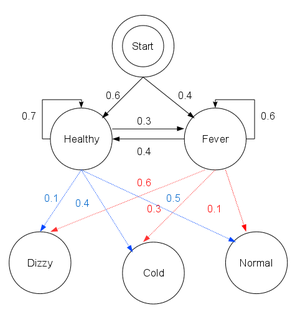

In [4]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print(line)
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)
        
viterbi(obs, states, start_p, trans_p, emit_p)

           0            1            2
Healthy: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512
The steps of states are Healthy Healthy Fever with highest probability of 0.01512
